<a href="https://colab.research.google.com/github/BlackJack2021/Zenn_TimeSeriesSpuriousRegression/blob/main/20220611_Zenn_%E8%A6%8B%E3%81%9B%E3%81%8B%E3%81%91%E3%81%AE%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## シミュレーション1. 単なる正規分布乱数の回帰

In [ ]:
# サンプル数とシード値を指定
num_of_sample = 1000
np.random.seed(8888)

# 標準正規分布（もちろん独立）に従って u, v の２系列を作成
u = np.random.randn(num_of_sample)
v = np.random.randn(num_of_sample)

# 回帰分析の定数項を推定するため準備
u_add_const = sm.add_constant(u)

# 線形回帰の推定と推定結果の出力
linear_model = sm.OLS(endog=v, exog=u_add_const)
fitted_linear_model = linear_model.fit()
print(fitted_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.001761
Date:                Tue, 14 Jun 2022   Prob (F-statistic):              0.967
Time:                        12:01:43   Log-Likelihood:                -1389.6
No. Observations:                1000   AIC:                             2783.
Df Residuals:                     998   BIC:                             2793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0210      0.031     -0.683      0.4

## シミュレーション2. ランダムウォーク系列の回帰分析

In [ ]:
# ランダムウォークに従う系列に変更(これでランダムウォークになる理由は以下で説明)
x = np.cumsum(u)
y = np.cumsum(v)

# 回帰分析の定数項を推定するための準備
x_add_const = sm.add_constant(x)

# 線形回帰の推定と推定結果の出力
rw_linear_model = sm.OLS(endog=y, exog=x_add_const)
rw_fitted_linear_model = rw_linear_model.fit()
print(rw_fitted_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     563.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.78e-99
Time:                        12:01:57   Log-Likelihood:                -3233.7
No. Observations:                1000   AIC:                             6471.
Df Residuals:                     998   BIC:                             6481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5611      0.272    -42.555      0.0

## 納得できない人のために1000回シミュレーション

In [ ]:
num_of_simulation = 1000

# 推定係数を格納するための箱
estimated_coefficients = []
p_values = []

for i in np.arange(num_of_simulation):

    # 乱数を変更する
    np.random.seed(i)
    # 標準正規分布（もちろん独立）に従って u, v の２系列を作成
    u = np.random.randn(num_of_sample)
    v = np.random.randn(num_of_sample)
    # ランダムウォークに従う系列に変更
    x = np.cumsum(u)
    y = np.cumsum(v)

    # 回帰分析のための定数項を準備
    x_add_const = sm.add_constant(x)

    # 線形回帰の推定と推定結果の出力
    rw_linear_model = sm.OLS(endog=y, exog=x_add_const)
    rw_fitted_linear_model = rw_linear_model.fit()

    # 推定係数とp値を取得する
    estimated_coefficient = rw_fitted_linear_model.params[1]
    p_value = rw_fitted_linear_model.pvalues[1]
    
    # それぞれを格納する
    estimated_coefficients.append(estimated_coefficient)
    p_values.append(p_value)

In [ ]:
# p値が5%未満だった（有意水準5%で帰無仮説が棄却されるケース）割合を計算
null_hypothesis_testing_results = [p_value < 0.05 for p_value in p_values]
print(np.mean(null_hypothesis_testing_results))

# なんと91.9%の確率で有意な推定係数が得られる。（つまり、1000回中919回で有意水準5%で係数が有意だったことになる。）

0.919


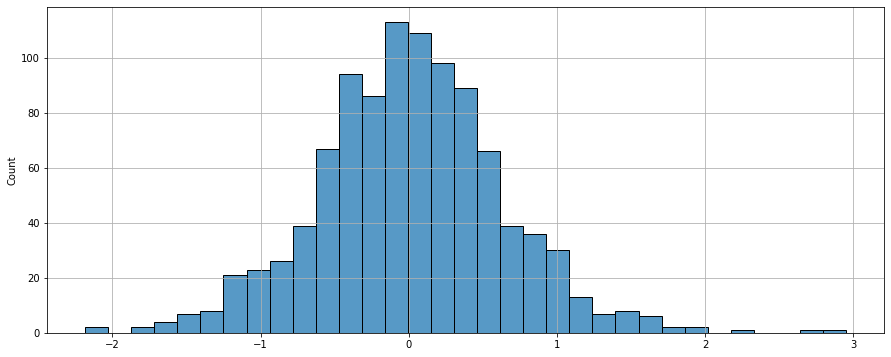

In [ ]:
# 年のため推定係数を確認
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(
    x = estimated_coefficients,
    ax = ax,
    kde = False
)
ax.grid()
plt.show()